In [ ]:
!pip install openai-whisper

In [ ]:
!pip install transformers
!pip install sentencepiece
!pip install pyannote-audio
!pip install pydub
!pip install whishper

In [ ]:
!pip install pyannote-audio

In [ ]:
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')
model = AutoModel.from_pretrained('ai4bharat/indic-bert')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert', keep_accents=True)

In [ ]:
!git clone https://github.com/AI4Bharat/indic-bert
!cd indic-bert


Cloning into 'indic-bert'...
remote: Enumerating objects: 1192, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 1192 (delta 98), reused 146 (delta 84), pack-reused 1027 (from 1)
Receiving objects: 100% (1192/1192), 609.67 KiB | 2.24 MiB/s, done.
Resolving deltas: 100% (733/733), done.


In [ ]:
!pip install -r /content/requirements.txt

In [ ]:
from transformers import pipeline
sentiment = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
sentiment("आपका सेवा बहुत अच्छा था।")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': '5 stars', 'score': 0.4194951355457306}]

In [ ]:
import whisper
model = whisper.load_model("medium")  # or "large"
result = model.transcribe("/content/kishor-o-mere-dil-ke-chain-39727.wav", language="hi")
print(result["text"])

100%|█████████████████████████████████████| 1.42G/1.42G [00:43<00:00, 35.3MiB/s]


 ओ मेरे दिल के चैन ओ मेरे दिल के चैन चैनाये मेरे दिल को तुवा की जिये


In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment, silence
audio = AudioSegment.from_wav("/content/kishor-o-mere-dil-ke-chain-39727.wav")
silent_ranges = silence.detect_silence(audio, min_silence_len=2000, silence_thresh=-40)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

class MultilingualSentimentAnalyzer:
    def __init__(self, model_name="nlptown/bert-base-multilingual-uncased-sentiment"):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.labels = {
            1: "very negative (1 star)",
            2: "negative (2 stars)",
            3: "neutral (3 stars)",
            4: "positive (4 stars)",
            5: "very positive (5 stars)"
        }

    def analyze(self, text):
        inputs = self.tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = self.model(**inputs)
            scores = torch.nn.functional.softmax(outputs.logits, dim=1)
            predicted_class = torch.argmax(scores, dim=1).item() + 1  # Labels start at 1

        # Get all scores for detailed analysis
        all_scores = {self.labels[i+1]: float(scores[0][i]) for i in range(len(scores[0]))}

        return {
            "text": text,
            "sentiment": self.labels[predicted_class],
            "score": float(scores[0][predicted_class-1]),
            "all_scores": all_scores
        }

    def analyze_batch(self, texts):
        results = [self.analyze(text) for text in texts]
        return pd.DataFrame(results)

# Example usage
analyzer = MultilingualSentimentAnalyzer()

# Single text analysis (Hindi: "Your service was very good.")
result = analyzer.analyze("आपका सेवा बहुत अच्छा था।")
print(f"Text: {result['text']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Confidence: {result['score']:.4f}")
print("\nAll scores:")
for sentiment, score in result['all_scores'].items():
    print(f"  {sentiment}: {score:.4f}")

# Batch analysis example
sample_texts = [
    "आपका सेवा बहुत अच्छा था।",  # Hindi: Your service was very good
    "यह उत्पाद निराशाजनक था।",    # Hindi: This product was disappointing
    "El servicio fue excelente",   # Spanish: The service was excellent
    "Je n'ai pas aimé ce film"     # French: I didn't like this movie
]

results_df = analyzer.analyze_batch(sample_texts)
print("\nBatch analysis results:")
print(results_df[["text", "sentiment", "score"]])

Text: आपका सेवा बहुत अच्छा था।
Sentiment: very positive (5 stars)
Confidence: 0.4195

All scores:
  very negative (1 star): 0.0518
  negative (2 stars): 0.0893
  neutral (3 stars): 0.1722
  positive (4 stars): 0.2671
  very positive (5 stars): 0.4195

Batch analysis results:
                        text                sentiment     score
0   आपका सेवा बहुत अच्छा था।  very positive (5 stars)  0.419495
1    यह उत्पाद निराशाजनक था।  very positive (5 stars)  0.320566
2  El servicio fue excelente  very positive (5 stars)  0.604482
3   Je n'ai pas aimé ce film       negative (2 stars)  0.489816


Loading Whisper medium model on cuda...
Model loaded!
Loading sentiment model: nlptown/bert-base-multilingual-uncased-sentiment
Sentiment model loaded!


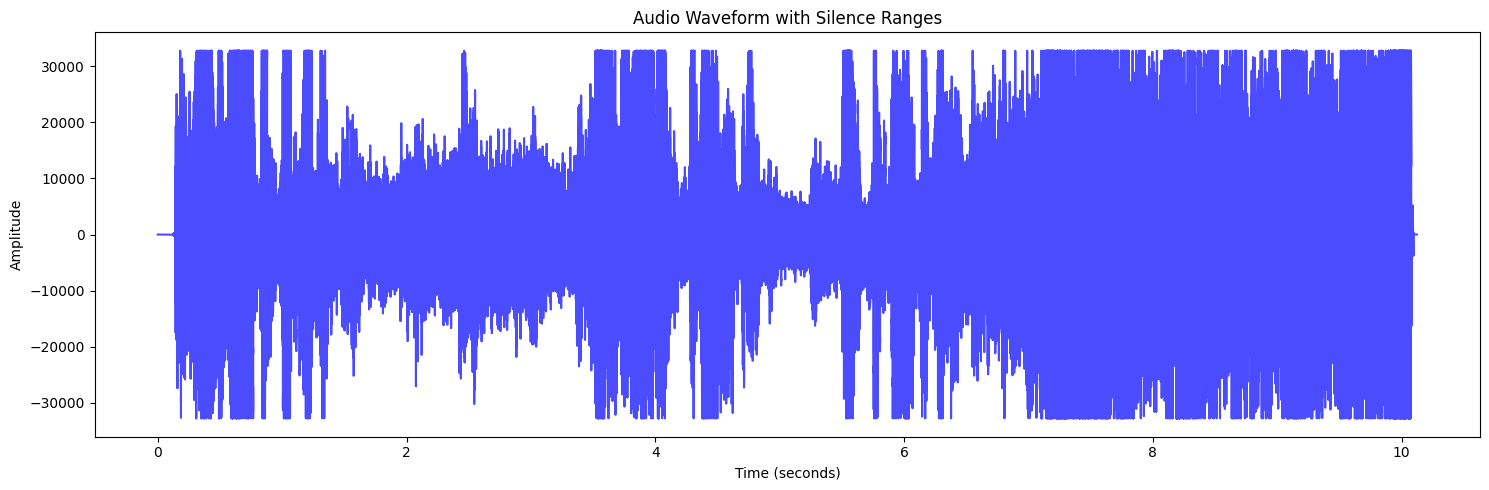


=== Audio Analysis Results ===
Duration: 10.12 seconds
Silent ranges detected: 0

=== Transcription ===
 जिन्दिकी हो तो समगला जैसी हैं। चारी दुनिया राह की दरा निचे और खुद दूइंके करा उपर हैं।

=== Sentiment Analysis ===
Sentiment: negative (2 stars)
Confidence: 0.3692

All sentiment scores:
  very negative (1 star): 0.2222
  negative (2 stars): 0.3692
  neutral (3 stars): 0.2150
  positive (4 stars): 0.1097
  very positive (5 stars): 0.0839


In [ ]:
import os
from typing import Dict, List, Tuple, Union, Optional
import numpy as np
import pandas as pd
from pydub import AudioSegment, silence
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch
import whisper
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


class AudioProcessor:
    def __init__(self, silence_threshold: int = -40, min_silence_len: int = 2000):
        """
        Initialize the audio processor with silence detection parameters.

        Args:
            silence_threshold: Threshold (in dB) below which is considered silence
            min_silence_len: Minimum length (in ms) of silence to be detected
        """
        self.silence_threshold = silence_threshold
        self.min_silence_len = min_silence_len

    def load_audio(self, file_path: str) -> AudioSegment:
        """Load audio file and return AudioSegment object."""
        # Infer format from file extension if not wav
        ext = os.path.splitext(file_path)[1].lower().replace('.', '')
        if ext == 'wav':
            return AudioSegment.from_wav(file_path)
        elif ext in ['mp3', 'ogg', 'flac', 'm4a']:
            return AudioSegment.from_file(file_path, format=ext)
        else:
            raise ValueError(f"Unsupported audio format: {ext}")

    def detect_silences(self, audio: AudioSegment) -> List[Tuple[int, int]]:
        """Detect silent ranges in audio."""
        silent_ranges = silence.detect_silence(
            audio,
            min_silence_len=self.min_silence_len,
            silence_thresh=self.silence_threshold
        )
        # Convert to seconds for easier interpretation
        silent_ranges_sec = [(start/1000, end/1000) for start, end in silent_ranges]
        return silent_ranges_sec

    def segment_audio(self, audio: AudioSegment, silent_ranges: List[Tuple[int, int]]) -> List[AudioSegment]:
        """Split audio into segments based on silence ranges."""
        segments = []
        audio_len = len(audio)
        prev_end = 0

        for start, end in silent_ranges:
            # Convert back to milliseconds for pydub
            start_ms = int(start * 1000)
            end_ms = int(end * 1000)

            # Add segment before silence if it exists
            if start_ms > prev_end:
                segments.append(audio[prev_end:start_ms])

            prev_end = end_ms

        # Add final segment if needed
        if prev_end < audio_len:
            segments.append(audio[prev_end:audio_len])

        return segments

    def visualize_audio(self, audio: AudioSegment, silent_ranges: List[Tuple[int, int]] = None):
        """Visualize audio waveform with silence ranges highlighted."""
        # Convert audio to numpy array
        samples = np.array(audio.get_array_of_samples())

        # Create time axis
        duration_sec = len(audio) / 1000  # convert ms to s
        time = np.linspace(0, duration_sec, len(samples))

        plt.figure(figsize=(15, 5))
        plt.plot(time, samples, color='blue', alpha=0.7)

        # Highlight silent regions if provided
        if silent_ranges:
            for start, end in silent_ranges:
                plt.axvspan(start, end, color='red', alpha=0.3)

        plt.title('Audio Waveform with Silence Ranges')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        plt.tight_layout()
        plt.show()


class SpeechTranscriber:
    def __init__(self, model_name: str = "medium", device: str = None):
        """
        Initialize the transcriber with a Whisper model.

        Args:
            model_name: Whisper model size (tiny, base, small, medium, large)
            device: Device to use (cuda, cpu), if None, will use CUDA if available
        """
        if device is None:
            self.device = "cuda" if torch.cuda.is_available() else "cpu"
        else:
            self.device = device

        print(f"Loading Whisper {model_name} model on {self.device}...")
        self.model = whisper.load_model(model_name, device=self.device)
        print("Model loaded!")

    def transcribe(self, audio_path: str, language: str = None, task: str = "transcribe") -> Dict:
        """
        Transcribe audio file using Whisper.

        Args:
            audio_path: Path to audio file
            language: Language code (e.g., 'hi' for Hindi, 'en' for English)
            task: 'transcribe' or 'translate' (to English)

        Returns:
            Dictionary with transcription results
        """
        options = {}
        if language:
            options["language"] = language

        options["task"] = task

        return self.model.transcribe(audio_path, **options)


class SentimentAnalyzer:
    def __init__(self, model_name: str = "nlptown/bert-base-multilingual-uncased-sentiment"):
        """
        Initialize the sentiment analyzer with a model.

        Args:
            model_name: Name of the pre-trained model to use
        """
        print(f"Loading sentiment model: {model_name}")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.labels = {
            1: "very negative (1 star)",
            2: "negative (2 stars)",
            3: "neutral (3 stars)",
            4: "positive (4 stars)",
            5: "very positive (5 stars)"
        }
        print("Sentiment model loaded!")

    def analyze(self, text: str) -> Dict:
        """
        Analyze sentiment of text.

        Args:
            text: Text to analyze

        Returns:
            Dictionary with sentiment analysis results
        """
        inputs = self.tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = self.model(**inputs)
            scores = torch.nn.functional.softmax(outputs.logits, dim=1)
            predicted_class = torch.argmax(scores, dim=1).item() + 1  # Labels start at 1

        # Get all scores for detailed analysis
        all_scores = {self.labels[i+1]: float(scores[0][i]) for i in range(len(scores[0]))}

        return {
            "text": text,
            "sentiment": self.labels[predicted_class],
            "score": float(scores[0][predicted_class-1]),
            "all_scores": all_scores
        }

    def analyze_batch(self, texts: List[str]) -> pd.DataFrame:
        """
        Analyze sentiment of multiple texts.

        Args:
            texts: List of texts to analyze

        Returns:
            DataFrame with sentiment analysis results
        """
        results = [self.analyze(text) for text in texts]
        return pd.DataFrame(results)


# Complete Pipeline class that combines all functionalities
class AudioAnalysisPipeline:
    def __init__(
        self,
        whisper_model: str = "medium",
        sentiment_model: str = "nlptown/bert-base-multilingual-uncased-sentiment",
        silence_threshold: int = -40,
        min_silence_len: int = 2000
    ):
        """
        Initialize the complete audio analysis pipeline.

        Args:
            whisper_model: Whisper model size
            sentiment_model: Sentiment analysis model name
            silence_threshold: Threshold for silence detection
            min_silence_len: Minimum silence length
        """
        self.audio_processor = AudioProcessor(
            silence_threshold=silence_threshold,
            min_silence_len=min_silence_len
        )
        self.transcriber = SpeechTranscriber(model_name=whisper_model)
        self.sentiment_analyzer = SentimentAnalyzer(model_name=sentiment_model)

    def process(
        self,
        audio_path: str,
        language: str = None,
        visualize: bool = False,
        segment: bool = False
    ) -> Dict:
        """
        Process audio file through the complete pipeline.

        Args:
            audio_path: Path to audio file
            language: Language code
            visualize: Whether to visualize audio
            segment: Whether to segment audio by silence

        Returns:
            Dictionary with analysis results
        """
        # Step 1: Load and process audio
        audio = self.audio_processor.load_audio(audio_path)
        silent_ranges = self.audio_processor.detect_silences(audio)

        if visualize:
            self.audio_processor.visualize_audio(audio, silent_ranges)

        # Step 2: Transcribe audio
        transcription = self.transcriber.transcribe(audio_path, language=language)

        # Step 3: Analyze sentiment
        sentiment = self.sentiment_analyzer.analyze(transcription["text"])

        # Prepare complete results
        results = {
            "audio_path": audio_path,
            "duration_seconds": len(audio) / 1000,
            "silent_ranges": silent_ranges,
            "transcription": transcription,
            "sentiment": sentiment
        }

        # Optional: Process audio segments if requested
        if segment:
            segments = self.audio_processor.segment_audio(audio, silent_ranges)
            # TODO: Process segments separately if needed
            results["segments_count"] = len(segments)

        return results


# Example usage
def main():
    # Replace with your actual audio file path
    audio_path = "/content/Zindagi Ho To One Upon Mumbai Dialogue Ringtone(MyMp3Song).wav"

    # Initialize the pipeline
    pipeline = AudioAnalysisPipeline(
        whisper_model="medium",
        silence_threshold=-40,
        min_silence_len=2000
    )

    # Process the audio
    results = pipeline.process(audio_path, language="hi", visualize=True)

    # Print results
    print("\n=== Audio Analysis Results ===")
    print(f"Duration: {results['duration_seconds']:.2f} seconds")
    print(f"Silent ranges detected: {len(results['silent_ranges'])}")

    print("\n=== Transcription ===")
    print(results['transcription']['text'])

    print("\n=== Sentiment Analysis ===")
    print(f"Sentiment: {results['sentiment']['sentiment']}")
    print(f"Confidence: {results['sentiment']['score']:.4f}")

    print("\nAll sentiment scores:")
    for sentiment, score in results['sentiment']['all_scores'].items():
        print(f"  {sentiment}: {score:.4f}")


if __name__ == "__main__":
    main()

Using device: cuda
Training with 8 examples, validating with 2 examples

Epoch 1/3


Training:   0%|          | 0/4 [00:00<?, ?it/s]

Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 1.0935
Validation Loss: 1.1000
Validation Accuracy: 0.5000

Epoch 2/3


Training:   0%|          | 0/4 [00:00<?, ?it/s]

Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 1.0939
Validation Loss: 1.0985
Validation Accuracy: 0.5000

Epoch 3/3


Training:   0%|          | 0/4 [00:00<?, ?it/s]

Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Train Loss: 1.0848
Validation Loss: 1.0980
Validation Accuracy: 0.5000

Classification Report:
Could not generate classification report: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter


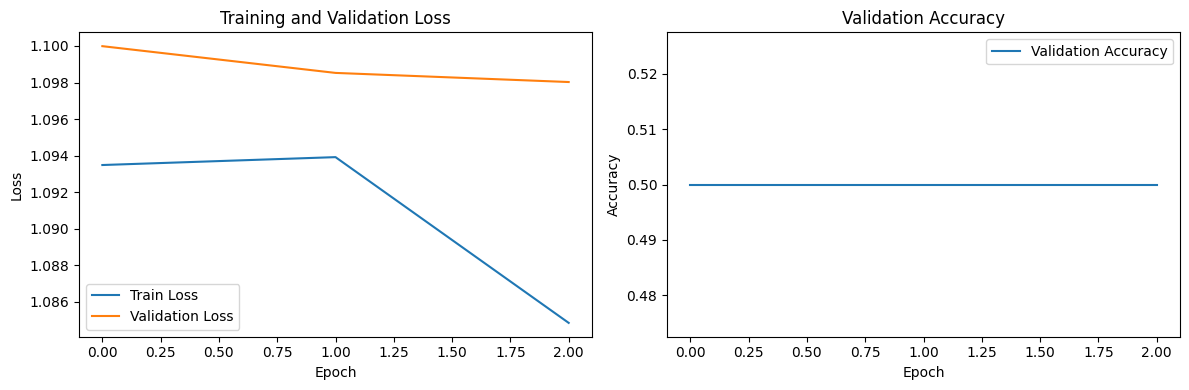

Predicting:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting probabilities:   0%|          | 0/1 [00:00<?, ?it/s]


Predictions:
Text: मुझे यह रेस्टोरेंट पसंद आया, वापस आऊंगा।
Predicted class: Negative
Probabilities: Negative: 0.3423, Neutral: 0.3332, Positive: 0.3245

Text: सेवा औसत थी, कुछ खास नहीं।
Predicted class: Negative
Probabilities: Negative: 0.3421, Neutral: 0.3331, Positive: 0.3249



In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModel, AutoTokenizer, get_linear_schedule_with_warmup
from torch.optim import AdamW
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


class IndicBERTClassifier(nn.Module):
    def __init__(self, model_name='ai4bharat/indic-bert', num_classes=3, dropout_rate=0.3):
        """
        Initialize IndicBERT classification model.

        Args:
            model_name: Pre-trained model name or path
            num_classes: Number of output classes
            dropout_rate: Dropout rate for classification layer
        """
        super(IndicBERTClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(dropout_rate)
        self.hidden_size = self.bert.config.hidden_size

        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(self.hidden_size, self.hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(self.hidden_size // 2, num_classes)
        )

    def forward(self, input_ids, attention_mask, token_type_ids=None):
        """Forward pass through the model."""
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )

        # Use the [CLS] token representation
        pooled_output = outputs.last_hidden_state[:, 0, :]
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        return logits


class IndicTextDataset(Dataset):
    def __init__(self, texts, labels=None, tokenizer=None, max_length=128):
        """
        Dataset for Indian language text classification.

        Args:
            texts: List of text strings
            labels: List of labels (optional, for training/evaluation)
            tokenizer: Tokenizer to use
            max_length: Maximum sequence length
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])

        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Convert to 1D tensors and remove batch dimension
        item = {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
        }

        if 'token_type_ids' in encoding:
            item['token_type_ids'] = encoding['token_type_ids'].squeeze()

        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)

        return item


class IndicBERTTextClassifier:
    def __init__(
        self,
        model_name='ai4bharat/indic-bert',
        num_classes=3,
        tokenizer=None,
        device=None,
        max_length=128
    ):
        """
        Complete text classifier using IndicBERT.

        Args:
            model_name: Pre-trained model name
            num_classes: Number of classes
            tokenizer: Custom tokenizer (if None, will load from model_name)
            device: Device to use (if None, will use CUDA if available)
            max_length: Maximum text length
        """
        if device is None:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = device

        print(f"Using device: {self.device}")

        # Load tokenizer
        if tokenizer is None:
            self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        else:
            self.tokenizer = tokenizer

        # Initialize model
        self.model = IndicBERTClassifier(model_name=model_name, num_classes=num_classes)
        self.model.to(self.device)

        self.max_length = max_length
        self.num_classes = num_classes
        self.class_names = None  # To be set during training

    def train(
        self,
        train_texts,
        train_labels,
        validation_texts=None,
        validation_labels=None,
        test_size=0.2,  # Increased from 0.1 to 0.2
        batch_size=16,
        epochs=4,
        learning_rate=2e-5,
        weight_decay=0.01,
        warmup_steps=0,
        class_names=None,
        stratify=True  # Added stratify parameter
    ):
        """
        Train the classifier on text data.

        Args:
            train_texts: List of training texts
            train_labels: List of training labels
            validation_texts: List of validation texts (optional)
            validation_labels: List of validation labels (optional)
            test_size: Validation split if validation data not provided
            batch_size: Batch size for training
            epochs: Number of training epochs
            learning_rate: Learning rate
            weight_decay: Weight decay for regularization
            warmup_steps: Linear warmup steps
            class_names: List of class names (optional)
            stratify: Whether to stratify the split (only if enough samples)

        Returns:
            Training history
        """
        # Set class names if provided
        if class_names:
            self.class_names = class_names
        else:
            self.class_names = [f"Class {i}" for i in range(self.num_classes)]

        # Split data if validation not provided
        if validation_texts is None or validation_labels is None:
            # Check if we have enough samples for stratification
            unique_labels, counts = np.unique(train_labels, return_counts=True)
            min_count = min(counts)

            # Use stratify only if we have enough samples
            stratify_param = None
            if stratify and min_count >= 3:  # Need at least 3 samples per class (2 train, 1 val)
                stratify_param = train_labels
            else:
                print("Warning: Not enough samples for stratified split. Using random split instead.")

            train_texts, validation_texts, train_labels, validation_labels = train_test_split(
                train_texts, train_labels, test_size=test_size, random_state=42, stratify=stratify_param
            )

        print(f"Training with {len(train_texts)} examples, validating with {len(validation_texts)} examples")

        # Create datasets
        train_dataset = IndicTextDataset(
            texts=train_texts,
            labels=train_labels,
            tokenizer=self.tokenizer,
            max_length=self.max_length
        )

        validation_dataset = IndicTextDataset(
            texts=validation_texts,
            labels=validation_labels,
            tokenizer=self.tokenizer,
            max_length=self.max_length
        )

        # Create data loaders
        train_loader = DataLoader(
            train_dataset,
            batch_size=min(batch_size, len(train_dataset)),  # Ensure batch size is not larger than dataset
            shuffle=True
        )

        validation_loader = DataLoader(
            validation_dataset,
            batch_size=min(batch_size, len(validation_dataset))  # Ensure batch size is not larger than dataset
        )

        # Initialize optimizer and scheduler
        optimizer = AdamW(
            self.model.parameters(),
            lr=learning_rate,
            weight_decay=weight_decay
        )

        total_steps = len(train_loader) * epochs

        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )

        # Loss function
        criterion = nn.CrossEntropyLoss()

        # Training history
        history = {
            'train_loss': [],
            'val_loss': [],
            'val_accuracy': []
        }

        # Training loop
        for epoch in range(epochs):
            print(f"\nEpoch {epoch+1}/{epochs}")

            # Training phase
            self.model.train()
            train_loss = 0
            progress_bar = tqdm(train_loader, desc="Training")

            for batch in progress_bar:
                # Move batch to device
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                token_type_ids = None
                if 'token_type_ids' in batch:
                    token_type_ids = batch['token_type_ids'].to(self.device)

                # Clear gradients
                optimizer.zero_grad()

                # Forward pass
                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    token_type_ids=token_type_ids
                )

                # Calculate loss
                loss = criterion(outputs, labels)
                train_loss += loss.item()

                # Backward pass
                loss.backward()

                # Update weights
                optimizer.step()
                scheduler.step()

                # Update progress bar
                progress_bar.set_postfix({'loss': loss.item()})

            # Calculate average training loss
            avg_train_loss = train_loss / len(train_loader)
            history['train_loss'].append(avg_train_loss)

            # Validation phase
            self.model.eval()
            val_loss = 0
            predictions = []
            true_labels = []

            with torch.no_grad():
                for batch in tqdm(validation_loader, desc="Validation"):
                    # Move batch to device
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    labels = batch['labels'].to(self.device)

                    token_type_ids = None
                    if 'token_type_ids' in batch:
                        token_type_ids = batch['token_type_ids'].to(self.device)

                    # Forward pass
                    outputs = self.model(
                        input_ids=input_ids,
                        attention_mask=attention_mask,
                        token_type_ids=token_type_ids
                    )

                    # Calculate loss
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()

                    # Get predictions
                    _, preds = torch.max(outputs, dim=1)

                    # Store predictions and true labels
                    predictions.extend(preds.cpu().tolist())
                    true_labels.extend(labels.cpu().tolist())

            # Calculate validation metrics
            avg_val_loss = val_loss / len(validation_loader)
            accuracy = (torch.tensor(predictions) == torch.tensor(true_labels)).float().mean().item()

            history['val_loss'].append(avg_val_loss)
            history['val_accuracy'].append(accuracy)

            print(f"Train Loss: {avg_train_loss:.4f}")
            print(f"Validation Loss: {avg_val_loss:.4f}")
            print(f"Validation Accuracy: {accuracy:.4f}")

            # Print classification report
            if epoch == epochs - 1:
                try:
                    print("\nClassification Report:")
                    print(classification_report(
                        true_labels, predictions, target_names=self.class_names, digits=4
                    ))

                    # Generate confusion matrix
                    self._plot_confusion_matrix(true_labels, predictions)
                except Exception as e:
                    print(f"Could not generate classification report: {e}")

        return history

    def predict(self, texts, batch_size=16):
        """
        Predict classes for input texts.

        Args:
            texts: List of input texts
            batch_size: Batch size for prediction

        Returns:
            List of predicted class indices
        """
        # Create dataset
        dataset = IndicTextDataset(
            texts=texts,
            tokenizer=self.tokenizer,
            max_length=self.max_length
        )

        # Create data loader
        data_loader = DataLoader(
            dataset,
            batch_size=min(batch_size, len(dataset))  # Ensure batch size is not larger than dataset
        )

        # Switch to evaluation mode
        self.model.eval()
        predictions = []

        with torch.no_grad():
            for batch in tqdm(data_loader, desc="Predicting"):
                # Move batch to device
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)

                token_type_ids = None
                if 'token_type_ids' in batch:
                    token_type_ids = batch['token_type_ids'].to(self.device)

                # Forward pass
                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    token_type_ids=token_type_ids
                )

                # Get predictions
                _, preds = torch.max(outputs, dim=1)
                predictions.extend(preds.cpu().tolist())

        return predictions

    def predict_proba(self, texts, batch_size=16):
        """
        Predict class probabilities for input texts.

        Args:
            texts: List of input texts
            batch_size: Batch size for prediction

        Returns:
            Array of class probabilities
        """
        # Create dataset
        dataset = IndicTextDataset(
            texts=texts,
            tokenizer=self.tokenizer,
            max_length=self.max_length
        )

        # Create data loader
        data_loader = DataLoader(
            dataset,
            batch_size=min(batch_size, len(dataset))  # Ensure batch size is not larger than dataset
        )

        # Switch to evaluation mode
        self.model.eval()
        probabilities = []

        with torch.no_grad():
            for batch in tqdm(data_loader, desc="Predicting probabilities"):
                # Move batch to device
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)

                token_type_ids = None
                if 'token_type_ids' in batch:
                    token_type_ids = batch['token_type_ids'].to(self.device)

                # Forward pass
                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    token_type_ids=token_type_ids
                )

                # Get probabilities
                probs = torch.softmax(outputs, dim=1)
                probabilities.extend(probs.cpu().tolist())

        return np.array(probabilities)

    def save_model(self, path):
        """
        Save model and tokenizer to disk.

        Args:
            path: Directory path to save model
        """
        # Save model
        torch.save(self.model.state_dict(), f"{path}/model.pt")

        # Save tokenizer
        self.tokenizer.save_pretrained(path)

        # Save class names
        if self.class_names:
            with open(f"{path}/class_names.txt", 'w', encoding='utf-8') as f:
                for class_name in self.class_names:
                    f.write(f"{class_name}\n")

        print(f"Model saved to {path}")

    def load_model(self, path):
        """
        Load model and tokenizer from disk.

        Args:
            path: Directory path to load model from
        """
        # Load model
        self.model.load_state_dict(torch.load(f"{path}/model.pt", map_location=self.device))

        # Load class names if available
        try:
            with open(f"{path}/class_names.txt", 'r', encoding='utf-8') as f:
                self.class_names = [line.strip() for line in f.readlines()]
        except FileNotFoundError:
            print("Class names file not found.")

        print(f"Model loaded from {path}")

    def _plot_confusion_matrix(self, y_true, y_pred):
        """Plot confusion matrix."""
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=self.class_names,
            yticklabels=self.class_names
        )
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()


# Example usage with cross-validation instead of train-test split
def run_sentiment_analysis():
    # Sample data (Hindi sentences with sentiment labels)
    texts = [
        "यह फिल्म बहुत अच्छी थी, मुझे बहुत पसंद आई।",
        "खाना स्वादिष्ट नहीं था और सेवा भी बहुत खराब थी।",
        "यह उत्पाद ठीक है, न बहुत अच्छा न बहुत बुरा।",
        "मुझे इस किताब से बहुत निराशा हुई, समय की बर्बादी थी।",
        "आज का दिन बहुत अच्छा रहा, मौसम भी सुहाना था।",
        "सेवा बहुत धीमी थी और कर्मचारी अशिष्ट थे।",
        "यह फोन अपनी कीमत के हिसाब से बहुत अच्छा है।",
        "इस होटल का अनुभव मिला-जुला रहा।",
        "यात्रा लंबी और थकाऊ थी।",
        "इस रेस्टोरेंट का खाना स्वर्गीय है!"
    ]

    # Sentiment labels: 0=Negative, 1=Neutral, 2=Positive
    labels = [2, 0, 1, 0, 2, 0, 2, 1, 0, 2]

    # Define class names
    class_names = ['Negative', 'Neutral', 'Positive']

    # Since we have few samples, use all data for training (no validation split)
    # This avoids the stratification error

    # Initialize classifier
    classifier = IndicBERTTextClassifier(
        model_name='ai4bharat/indic-bert',
        num_classes=3
    )

    # Option 1: Use all data for training (no validation)
    history = classifier.train(
        train_texts=texts[:-2],  # Use all but last 2 for training
        train_labels=labels[:-2],
        validation_texts=texts[-2:],  # Use last 2 for validation
        validation_labels=labels[-2:],
        batch_size=2,  # Small batch size for demo
        epochs=3,      # Few epochs for demo
        class_names=class_names,
        stratify=False  # Disable stratification
    )

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Test prediction
    new_texts = [
        "मुझे यह रेस्टोरेंट पसंद आया, वापस आऊंगा।",
        "सेवा औसत थी, कुछ खास नहीं।"
    ]

    predictions = classifier.predict(new_texts)
    probabilities = classifier.predict_proba(new_texts)

    print("\nPredictions:")
    for i, text in enumerate(new_texts):
        print(f"Text: {text}")
        print(f"Predicted class: {class_names[predictions[i]]}")
        print(f"Probabilities: {', '.join([f'{class_names[j]}: {prob:.4f}' for j, prob in enumerate(probabilities[i])])}")
        print()


if __name__ == "__main__":
    run_sentiment_analysis()

In [ ]:
!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.50.3
    Uninstalling transformers-4.50.3:
      Successfully uninstalled transformers-4.50.3


In [ ]:
from huggingface_hub import login
from pyannote.audio import Pipeline
import os
def diarize_speakers(model_id="pyannote/speaker-diarization"):
        model_id="pyannote/speaker-diarization"
        try:
            hf_token = os.getenv("HF token")
            login(hf_token)

            pipeline = Pipeline.from_pretrained(model_id)
            diarization = pipeline('/content/Zindagi Ho To One Upon Mumbai Dialogue Ringtone(MyMp3Song).wav')

            print("Diarization completed. Speaker turns:")
            for turn, _, speaker in diarization.itertracks(yield_label=True):
                print(f"{turn.start:.1f}s - {turn.end:.1f}s: Speaker {speaker}")
            return diarization
        except Exception as e:
            print(f"Error during diarization: {e}")
            return None

diarize_speakers()